In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# coordinates

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Loop through all the cities in the list.
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(len(city_data))
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | batagay
Processing Record 3 of Set 1 | husavik
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | panjab
Processing Record 6 of Set 1 | warri
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | marcona
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | punta 

Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | amahai
Processing Record 41 of Set 4 | catamarca
Processing Record 42 of Set 4 | robertsport
Processing Record 43 of Set 4 | portsmouth
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | kloulklubed
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | xai-xai
Processing Record 2 of Set 5 | berbera
Processing Record 3 of Set 5 | cam ranh
Processing Record 4 of Set 5 | bonthe
Processing Record 5 of Set 5 | noumea
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 5 | chumikan
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 

Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | angelholm
City not found. Skipping...
Processing Record 33 of Set 8 | nyurba
Processing Record 34 of Set 8 | punta alta
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | valparaiso
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | shiyan
Processing Record 39 of Set 8 | flinders
Processing Record 40 of Set 8 | tanout
Processing Record 41 of Set 8 | sambava
Processing Record 42 of Set 8 | chisinau
Processing Record 43 of Set 8 | buraydah
Processing Record 44 of Set 8 | makurdi
Processing Record 45 of Set 8 | serdobsk
Processing Record 46 of Set 8 | palana
Processing Record 47 of Set 8 | port lincoln
Processing Record 48 of Set 8 | zyryanka
Processing Record 49 of Set 8 | rungata
City not found. Skipping...
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | vila velha
Processing Record 2 of Set 9 | revelstoke
Processing Record 3 of Set 9 | poum
Processi

Processing Record 17 of Set 12 | moose factory
Processing Record 18 of Set 12 | veraval
Processing Record 19 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 12 | badnawar
Processing Record 21 of Set 12 | tual
Processing Record 22 of Set 12 | along
Processing Record 23 of Set 12 | pouembout
Processing Record 24 of Set 12 | vanimo
Processing Record 25 of Set 12 | cabedelo
Processing Record 26 of Set 12 | torreon
Processing Record 27 of Set 12 | torva
Processing Record 28 of Set 12 | acapulco
Processing Record 29 of Set 12 | saldanha
Processing Record 30 of Set 12 | riberalta
Processing Record 31 of Set 12 | likasi
Processing Record 32 of Set 12 | manta
Processing Record 33 of Set 12 | terrace
Processing Record 34 of Set 12 | mananjary
Processing Record 35 of Set 12 | registro
Processing Record 36 of Set 12 | salalah
Processing Record 37 of Set 12 | charlestown
Processing Record 38 of Set 12 | sabha
Processing Record 39 of Set 12 | porto novo
Processing R

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-2.63,70,100,9.42,GL,2022-01-30 20:50:34
1,Batagay,67.6333,134.6333,-35.27,99,50,1.77,RU,2022-01-30 20:45:20
2,Husavik,66.0449,-17.3389,22.91,63,47,30.13,IS,2022-01-30 20:49:33
3,Panjab,34.3880,67.0233,13.50,99,97,0.81,AF,2022-01-30 20:54:31
4,Warri,5.5167,5.7500,76.10,62,32,3.56,NG,2022-01-30 20:54:31
5,Hobart,-42.8794,147.3294,62.11,90,75,1.01,AU,2022-01-30 20:48:39
6,Tasiilaq,65.6145,-37.6368,8.76,45,95,17.18,GL,2022-01-30 20:48:31
7,Albany,42.6001,-73.9662,21.81,37,13,1.99,US,2022-01-30 20:52:31
8,Airai,-8.9266,125.4092,60.76,91,78,3.96,TL,2022-01-30 20:49:47
9,Busselton,-33.6500,115.3333,63.09,65,87,17.78,AU,2022-01-30 20:49:57


In [15]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-01-30 20:50:34,72.7868,-56.1549,-2.63,70,100,9.42
1,Batagay,RU,2022-01-30 20:45:20,67.6333,134.6333,-35.27,99,50,1.77
2,Husavik,IS,2022-01-30 20:49:33,66.0449,-17.3389,22.91,63,47,30.13
3,Panjab,AF,2022-01-30 20:54:31,34.3880,67.0233,13.50,99,97,0.81
4,Warri,NG,2022-01-30 20:54:31,5.5167,5.7500,76.10,62,32,3.56
...,...,...,...,...,...,...,...,...,...
564,Pimentel,PE,2022-01-30 21:09:34,-6.8367,-79.9342,77.29,53,0,19.57
565,Jogindarnagar,IN,2022-01-30 21:09:34,31.9833,76.7667,48.45,42,52,7.99
566,Touba,CI,2022-01-30 21:09:35,8.2833,-7.6833,79.29,15,40,2.91
567,Inhambane,MZ,2022-01-30 21:09:35,-23.8650,35.3833,75.16,81,88,8.10


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

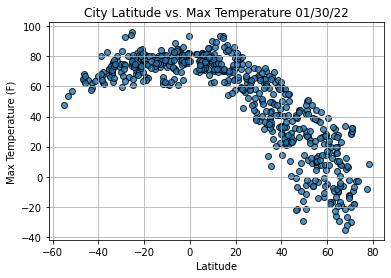

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

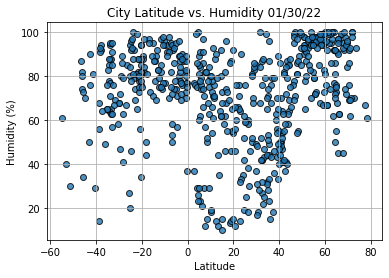

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

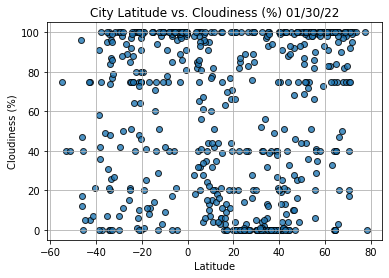

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

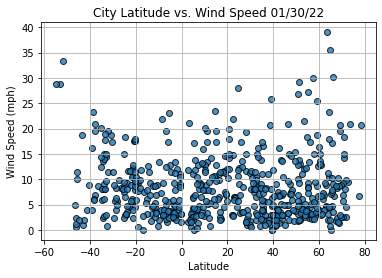

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()